**Question 1**

In [37]:
import numpy as np
import matplotlib.pyplot as plt

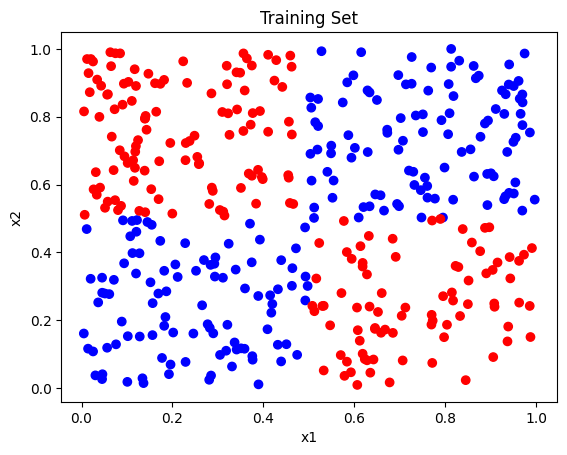

In [38]:
# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of points for the training and test sets
N_train = 400
N_test = 100

# Generate random points with x1 and x2 in the range [0,1]
X_train = np.random.rand(N_train, 2)
X_test = np.random.rand(N_test, 2)

# Assign labels to the points based on the given criterion
y_train = np.zeros(N_train)
y_train[((X_train[:,0] >= 0) & (X_train[:,0] < 0.5) & (X_train[:,1] >= 0) & (X_train[:,1] < 0.5)) | ((X_train[:,0] > 0.5) & (X_train[:,0] <= 1) & (X_train[:,1] > 0.5) & (X_train[:,1] <= 1))] = 1
y_train[((X_train[:,0] > 0.5) & (X_train[:,0] <= 1) & (X_train[:,1] >= 0) & (X_train[:,1] < 0.5)) | ((X_train[:,0] >= 0) & (X_train[:,0] < 0.5) & (X_train[:,1] > 0.5) & (X_train[:,1] <= 1))] = 2

y_test = np.zeros(N_test)
y_test[((X_test[:,0] >= 0) & (X_test[:,0] < 0.5) & (X_test[:,1] >= 0) & (X_test[:,1] < 0.5)) | ((X_test[:,0] > 0.5) & (X_test[:,0] <= 1) & (X_test[:,1] > 0.5) & (X_test[:,1] <= 1))] = 1
y_test[((X_test[:,0] > 0.5) & (X_test[:,0] <= 1) & (X_test[:,1] >= 0) & (X_test[:,1] < 0.5)) | ((X_test[:,0] >= 0) & (X_test[:,0] < 0.5) & (X_test[:,1] > 0.5) & (X_test[:,1] <= 1))] = 2

# Visualize the training set
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Set')
plt.show()


In [39]:
X_train.shape

(400, 2)

In [40]:
# Generate random training data
np.random.seed(42)

# Define the MLP architecture
input_size = 2
hidden_size = 3
output_size = 1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_loss(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize the weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Define the learning rate and number of epochs
learning_rate = 0.1
num_epochs = 1000

# Train the MLP
for epoch in range(num_epochs):
    # Forward pass
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)

    # Compute the loss and print the progress
    loss = compute_loss(y_train, y_pred)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

    # Backward pass
    temp = sigmoid_derivative(z2)
    y_train = y_train.reshape(-1, 1)
    delta2 = (y_pred - y_train) * temp.reshape(-1, 1)
    dW2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis=0, keepdims=True)
    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(z1)
    dW1 = np.dot(X_train.T, delta1)
    db1 = np.sum(delta1, axis=0, keepdims=True)

    # Update the weights and biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1


Epoch 0, Loss: 0.7546530897944702
Epoch 100, Loss: 0.4850023739962755
Epoch 200, Loss: 0.4850023357724278
Epoch 300, Loss: 0.4850022987378312
Epoch 400, Loss: 0.48500226283817854
Epoch 500, Loss: 0.4850022280224093
Epoch 600, Loss: 0.485002194242471
Epoch 700, Loss: 0.48500216145310093
Epoch 800, Loss: 0.4850021296116273
Epoch 900, Loss: 0.485002098677787


In [41]:
# Forward pass on the test data
z1_test = np.dot(X_test, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
y_pred_test = sigmoid(z2_test)

# Round the predicted values to 0 or 1
y_pred_rounded_test = np.round(y_pred_test)

# Calculate the accuracy
accuracy_test = np.mean(y_pred_rounded_test == y_test)

print(f"Test accuracy: {accuracy_test}")

Test accuracy: 0.45


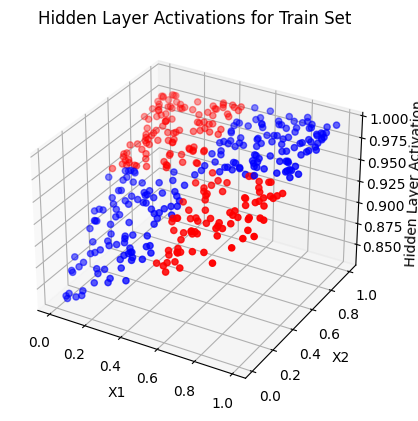

In [42]:
from mpl_toolkits.mplot3d import Axes3D

# Forward pass to get hidden layer activations
z1 = np.dot(X_train, W1) + b1
a1 = sigmoid(z1)

# Create figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color code the points based on their label
colors = ['blue' if y_train[i] == 1 else 'red' for i in range(len(y_train))]

# Plot the points with their corresponding hidden layer activations as the third dimension
ax.scatter(X_train[:,0], X_train[:,1], a1[:,0], c=colors)

# Set axis labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Hidden Layer Activation')
ax.set_title('Hidden Layer Activations for Train Set')

plt.show()


**Question 2**

In [9]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier

In [10]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Create an MLP classifier with a single hidden layer of 50 nodes
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic',solver ='lbfgs', max_iter=1000)

# Train the MLP classifier on the training set
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), max_iter=1000,
              solver='lbfgs')

**Hidden Layer Neurons: 50**

In [ ]:
# Make predictions on the testing set
y_pred = mlp.predict(X_test)

# Compute the class-wise F1-scores and overall accuracy
f1_scores = f1_score(y_test, y_pred, average=None)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Number of nodes in hidden layer: 50")
print(f"Class-wise F1-scores: {f1_scores}")
print(f"Overall accuracy: {accuracy}")


Number of nodes in hidden layer: 50
Class-wise F1-scores: [0.96436526 0.97128589 0.92352092 0.91734084 0.9313387  0.89803922
 0.9527897  0.93608522 0.91286615 0.91351924]
Overall accuracy: 0.9329285714285714


**Hidden Layer Neurons: 30**

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,), activation='logistic',solver ='lbfgs', max_iter=1000)

# Train the MLP classifier on the training set
mlp.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = mlp.predict(X_test)

# Compute the class-wise F1-scores and overall accuracy
f1_scores = f1_score(y_test, y_pred, average=None)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Number of nodes in hidden layer: 50")
print(f"Class-wise F1-scores: {f1_scores}")
print(f"Overall accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of nodes in hidden layer: 50
Class-wise F1-scores: [0.95414201 0.96573209 0.90249267 0.89339392 0.9129771  0.89241763
 0.9447809  0.93244592 0.88609467 0.89514426]
Overall accuracy: 0.919


**Hidden Layer Neurons: 20**

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(20,), activation='logistic',solver ='lbfgs', max_iter=1000)

# Train the MLP classifier on the training set
mlp.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = mlp.predict(X_test)

# Compute the class-wise F1-scores and overall accuracy
f1_scores = f1_score(y_test, y_pred, average=None)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Number of nodes in hidden layer: 50")
print(f"Class-wise F1-scores: {f1_scores}")
print(f"Overall accuracy: {accuracy}")

Number of nodes in hidden layer: 50
Class-wise F1-scores: [0.97826087 0.98148148]
Overall accuracy: 0.98


In [ ]:
# Create an MLP with two hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=200, random_state=42)

# Train the MLP on the training data
mlp.fit(X_train, y_train)

# Evaluate the MLP on the testing data
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9694
F1 Score: 0.9692
